Our goal in this challenge is to find the factors that affect the life expectancy. So, the target variable is Life_Expectancy. First we start with data cleaning by detecting and removing null-values and treating outliers. Then we move to Data Exploration and Feature Engineering. Do not forget that the target variable in our scenario is <b>"Life_Expectancy"</b>.

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

In [3]:
# Load dataset
le = pd.read_csv('/kaggle/input/life-expectency/Life Expectancy Data_HV22.csv', delimiter=',')
le.dataframeName = 'Life Expectancy Data.csv'

In [4]:
# First 5 rows of the dataset.
le.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
le[le["Status"] == "Developed"]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
112,Australia,2015,Developed,82.8,59.0,1,NaN,0.00000,93.0,74,...,93.0,NaN,93.0,0.1,56554.38760,23789338.0,0.6,0.6,0.937,20.4
113,Australia,2014,Developed,82.7,6.0,1,9.71,10769.36305,91.0,340,...,92.0,9.42,92.0,0.1,62214.69120,2346694.0,0.6,0.6,0.936,20.4
114,Australia,2013,Developed,82.5,61.0,1,9.87,11734.85381,91.0,158,...,91.0,9.36,91.0,0.1,67792.33860,23117353.0,0.6,0.6,0.933,20.3
115,Australia,2012,Developed,82.3,61.0,1,10.03,11714.99858,91.0,199,...,92.0,9.36,92.0,0.1,67677.63477,22728254.0,0.6,0.6,0.930,20.1
116,Australia,2011,Developed,82.0,63.0,1,10.30,10986.26527,92.0,190,...,92.0,9.20,92.0,0.1,62245.12900,223424.0,0.6,0.6,0.927,19.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2805,United States of America,2004,Developed,77.5,111.0,28,8.48,0.00000,92.0,37,...,92.0,15.14,96.0,0.1,NaN,NaN,0.7,0.6,NaN,NaN
2806,United States of America,2003,Developed,77.2,114.0,28,8.40,0.00000,92.0,56,...,91.0,15.60,96.0,0.1,NaN,NaN,0.7,0.6,NaN,NaN
2807,United States of America,2002,Developed,77.0,115.0,28,8.33,0.00000,88.0,41,...,9.0,14.55,94.0,0.1,NaN,NaN,0.8,0.6,NaN,NaN
2808,United States of America,2001,Developed,76.9,115.0,28,8.25,0.00000,89.0,116,...,89.0,13.73,94.0,0.1,NaN,NaN,0.8,0.6,NaN,NaN


In [6]:
# Description and context of the Life Expectancy (WHO) dataset can be found here.
  ## https://www.kaggle.com/kumarajarshi/life-expectancy-who

<b>Data Cleaning:</b>

In [7]:
# Renaming some column names as they contain trailing spaces.
le.rename(columns={" BMI ":"BMI","Life expectancy ":"Life_Expectancy","Adult Mortality":"Adult_Mortality",
                   "infant deaths":"Infant_Deaths","percentage expenditure":"Percentage_Exp","Hepatitis B":"HepatitisB",
                  "Measles ":"Measles"," BMI ":"BMI","under-five deaths ":"Under_Five_Deaths","Diphtheria ":"Diphtheria",
                  " HIV/AIDS":"HIV/AIDS"," thinness  1-19 years":"thinness_1to19_years"," thinness 5-9 years":"thinness_5to9_years","Income composition of resources":"Income_Comp_Of_Resources",
                   "Total expenditure":"Tot_Exp"},inplace=True)


In [8]:
# Verify descriptive statistics
le.describe()

,Year,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,BMI,Under_Five_Deaths,Polio,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [9]:
# Verifying whether data for each variable is according to its dataype or not.
le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   2938 non-null   object 
 1   Year                      2938 non-null   int64  
 2   Status                    2938 non-null   object 
 3   Life_Expectancy           2928 non-null   float64
 4   Adult_Mortality           2928 non-null   float64
 5   Infant_Deaths             2938 non-null   int64  
 6   Alcohol                   2744 non-null   float64
 7   Percentage_Exp            2938 non-null   float64
 8   HepatitisB                2385 non-null   float64
 9   Measles                   2938 non-null   int64  
 10  BMI                       2904 non-null   float64
 11  Under_Five_Deaths         2938 non-null   int64  
 12  Polio                     2919 non-null   float64
 13  Tot_Exp                   2712 non-null   float64
 14  Diphther

Yes, the data looks correct w.r.t the dataypes.

In [10]:
# Identify percentage of null values in each column.
le.isnull().sum()*100/le.isnull().count()

Country                      0.000000
Year                         0.000000
Status                       0.000000
Life_Expectancy              0.340368
Adult_Mortality              0.340368
Infant_Deaths                0.000000
Alcohol                      6.603131
Percentage_Exp               0.000000
HepatitisB                  18.822328
Measles                      0.000000
BMI                          1.157250
Under_Five_Deaths            0.000000
Polio                        0.646698
Tot_Exp                      7.692308
Diphtheria                   0.646698
HIV/AIDS                     0.000000
GDP                         15.248468
Population                  22.191967
thinness_1to19_years         1.157250
thinness_5to9_years          1.157250
Income_Comp_Of_Resources     5.684139
Schooling                    5.547992
dtype: float64

In [11]:
le = le.dropna(subset=['Life_Expectancy'])

In [12]:
def numerical_column_analysis(col):
    print("The maximum {} is {} according to the dataset".format(col , le[col].max()))
    print("The minimum {} is {} according to the dataset".format(col , le[col].min()))
    print("the standard deviation of {} is {}".format(col , le[col].std()))
    print("the median {} is {}".format(col , le[col].median()))
    print("the mean of {} is {}".format(col , le[col].mean()))
numerical_column_analysis("Life_Expectancy")

The maximum Life_Expectancy is 89.0 according to the dataset
The minimum Life_Expectancy is 36.3 according to the dataset
the standard deviation of Life_Expectancy is 9.523867487824301
the median Life_Expectancy is 72.1
the mean of Life_Expectancy is 69.22493169398908


In [13]:
print("Adult_morality")
numerical_column_analysis("Adult_Mortality")
print("Infant_Deaths")
numerical_column_analysis("Infant_Deaths")

Adult_morality
The maximum Adult_Mortality is 723.0 according to the dataset
The minimum Adult_Mortality is 1.0 according to the dataset
the standard deviation of Adult_Mortality is 124.29207900342186
the median Adult_Mortality is 144.0
the mean of Adult_Mortality is 164.79644808743168
Infant_Deaths
The maximum Infant_Deaths is 1800 according to the dataset
The minimum Infant_Deaths is 0 according to the dataset
the standard deviation of Infant_Deaths is 118.11444959808102
the median Infant_Deaths is 3.0
the mean of Infant_Deaths is 30.407445355191257


Adult Mortality is right skewed while infant mortality is left skewed. The 10 missing values in Adult mortality were also the missing values in life  expectency which have been taken care of. There seems to be a fault in the data since infant mortality is out of a thousand however the maximum value is 1800

In [14]:
le[le['Infant_Deaths'] >= 1000]

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,...,Polio,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling
1188,India,2013,Developing,67.6,187.0,1000,3.11,67.672304,7.0,13822,...,82.0,4.53,83.0,0.2,1452.195373,1.278562e+08,26.8,27.5,0.599,11.5
1189,India,2012,Developing,67.3,19.0,1100,3.10,64.969645,73.0,18668,...,79.0,4.39,82.0,0.2,1446.985410,1.263659e+08,26.9,27.6,0.590,11.3
1190,India,2011,Developing,66.8,193.0,1100,3.00,64.605901,44.0,33634,...,79.0,4.33,82.0,0.2,1461.671957,1.247236e+08,26.9,27.7,0.580,10.8
1191,India,2010,Developing,66.4,196.0,1200,2.77,57.733599,38.0,31458,...,76.0,4.28,79.0,0.2,1345.771530,1.239869e+07,27.0,27.8,0.569,10.4
1192,India,2009,Developing,66.0,2.0,1300,2.50,0.844186,37.0,56188,...,73.0,4.38,74.0,0.2,19.317765,1.214271e+08,27.0,27.8,0.563,10.5
1193,India,2008,Developing,65.5,23.0,1300,1.93,43.030433,29.0,44258,...,69.0,4.34,7.0,0.3,991.484634,1.197147e+08,27.0,27.9,0.556,10.2
1194,India,2007,Developing,65.2,26.0,1400,1.59,5.234770,6.0,41144,...,67.0,4.23,64.0,0.3,118.166373,1.179681e+09,27.1,28.0,0.546,9.9
1195,India,2006,Developing,64.8,28.0,1500,1.37,34.859427,6.0,64185,...,66.0,4.25,65.0,0.3,792.259698,1.161978e+09,27.1,28.0,0.536,9.7
1196,India,2005,Developing,64.4,211.0,1500,1.27,3.509637,8.0,36711,...,65.0,4.28,65.0,0.3,77.819000,1.144119e+09,27.2,28.1,0.526,9.4
1197,India,2004,Developing,64.0,214.0,1600,1.20,27.338009,6.0,55443,...,58.0,4.22,63.0,0.3,621.318377,1.126136e+09,27.2,28.2,0.518,9.2


It seems to be a series of false values from india
We'll continue without the false values

In [15]:
le = le[le['Infant_Deaths'] < 1000]

<b>Remove null values using interpolate()

In [16]:
country_list = le.Country.unique()
fill_list = ['Life_Expectancy','Adult_Mortality','Alcohol','HepatitisB','BMI','Polio','Tot_Exp','Diphtheria','GDP','Population','thinness_1to19_years','thinness_5to9_years','Income_Comp_Of_Resources','Schooling']


In [17]:
year_list = le.Year.unique()
fill_list = ['Life_Expectancy','Adult_Mortality','Alcohol','HepatitisB','BMI','Polio','Tot_Exp','Diphtheria','GDP','Population','thinness_1to19_years','thinness_5to9_years','Income_Comp_Of_Resources','Schooling']

In [18]:
# Treat null values using interpolation.
for country in country_list:
    le.loc[le['Country'] == country,fill_list] = le.loc[le['Country'] == country,fill_list].interpolate()
for year in year_list:
    le.loc[le['Year'] == year,fill_list] = le.loc[le['Year'] == year,fill_list].interpolate()
    
# Drop remaining null values after interpolation.
# le.dropna(inplace=True)

In [19]:
# Verifying null-values after applying above methods.
le.isnull().sum()

Country                     0
Year                        0
Status                      0
Life_Expectancy             0
Adult_Mortality             0
Infant_Deaths               0
Alcohol                     0
Percentage_Exp              0
HepatitisB                  0
Measles                     0
BMI                         0
Under_Five_Deaths           0
Polio                       0
Tot_Exp                     0
Diphtheria                  0
HIV/AIDS                    0
GDP                         0
Population                  0
thinness_1to19_years        0
thinness_5to9_years         0
Income_Comp_Of_Resources    0
Schooling                   0
dtype: int64

<b>Note: Used interpolation to fill missing values since our data set is a time series one.

<b>Detecting Outliers for each variable.

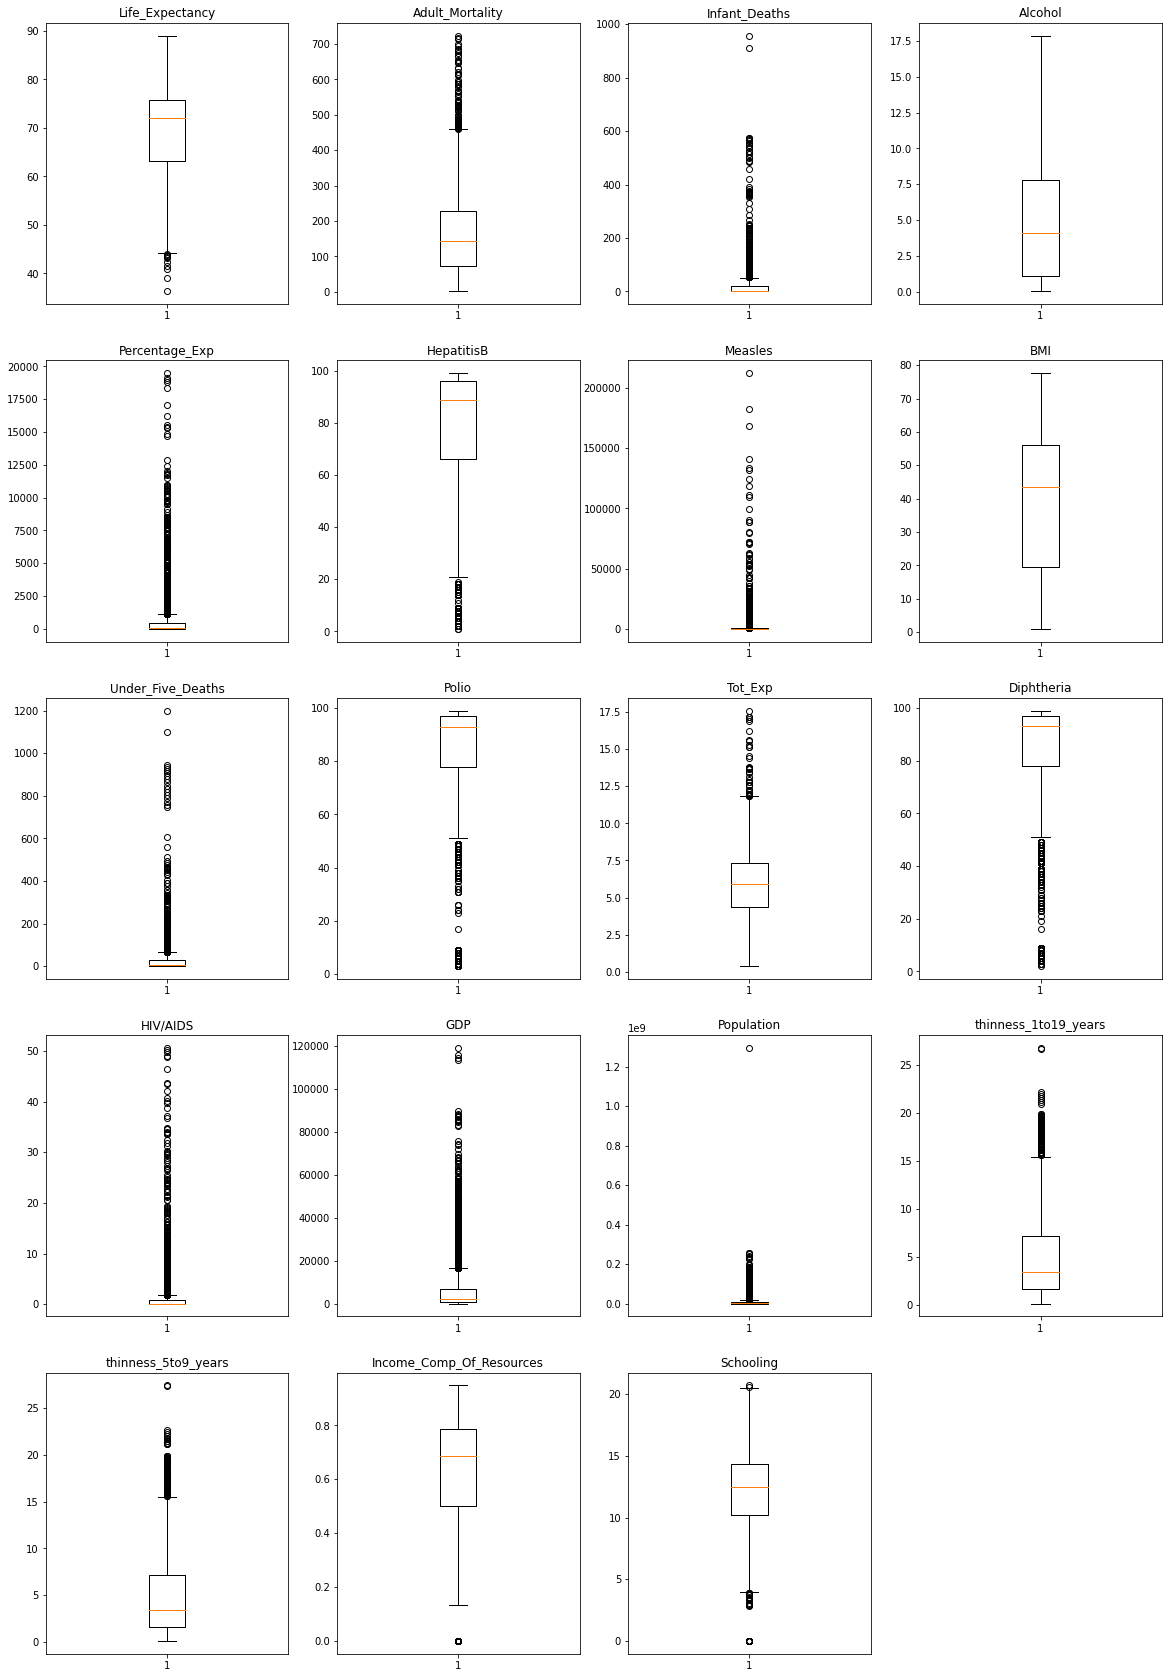

In [20]:
# Create a dictionary of columns.
col_dict = {'Life_Expectancy':1,'Adult_Mortality':2,'Infant_Deaths':3,'Alcohol':4,'Percentage_Exp':5,'HepatitisB':6,'Measles':7,'BMI':8,'Under_Five_Deaths':9,'Polio':10,'Tot_Exp':11,'Diphtheria':12,'HIV/AIDS':13,'GDP':14,'Population':15,'thinness_1to19_years':16,'thinness_5to9_years':17,'Income_Comp_Of_Resources':18,'Schooling':19}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(le[variable],whis=1.5)
                     plt.title(variable)

plt.show()

In [21]:
# Calculate number of outliers and its percentage in each variable using Tukey's method.

for variable in col_dict.keys():
    q75, q25 = np.percentile(le[variable], [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Number of outliers and percentage of it in {} : {} and {}".format(variable,
                                                                             len((np.where((le[variable] > max_val) | 
                                                                                           (le[variable] < min_val))[0])),len((np.where((le[variable] > max_val) | 
                                                                                           (le[variable] < min_val))[0]))*100/1987))

Number of outliers and percentage of it in Life_Expectancy : 10 and 0.5032712632108707
Number of outliers and percentage of it in Adult_Mortality : 82 and 4.12682435832914
Number of outliers and percentage of it in Infant_Deaths : 331 and 16.658278812279818
Number of outliers and percentage of it in Alcohol : 0 and 0.0
Number of outliers and percentage of it in Percentage_Exp : 385 and 19.37594363361852
Number of outliers and percentage of it in HepatitisB : 278 and 13.990941117262205
Number of outliers and percentage of it in Measles : 536 and 26.975339708102666
Number of outliers and percentage of it in BMI : 0 and 0.0
Number of outliers and percentage of it in Under_Five_Deaths : 392 and 19.72823351786613
Number of outliers and percentage of it in Polio : 286 and 14.3935581278309
Number of outliers and percentage of it in Tot_Exp : 43 and 2.1640664318067437
Number of outliers and percentage of it in Diphtheria : 302 and 15.198792148968295
Number of outliers and percentage of it in H

In [22]:
col_dict.keys()

dict_keys(['Life_Expectancy', 'Adult_Mortality', 'Infant_Deaths', 'Alcohol', 'Percentage_Exp', 'HepatitisB', 'Measles', 'BMI', 'Under_Five_Deaths', 'Polio', 'Tot_Exp', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness_1to19_years', 'thinness_5to9_years', 'Income_Comp_Of_Resources', 'Schooling'])

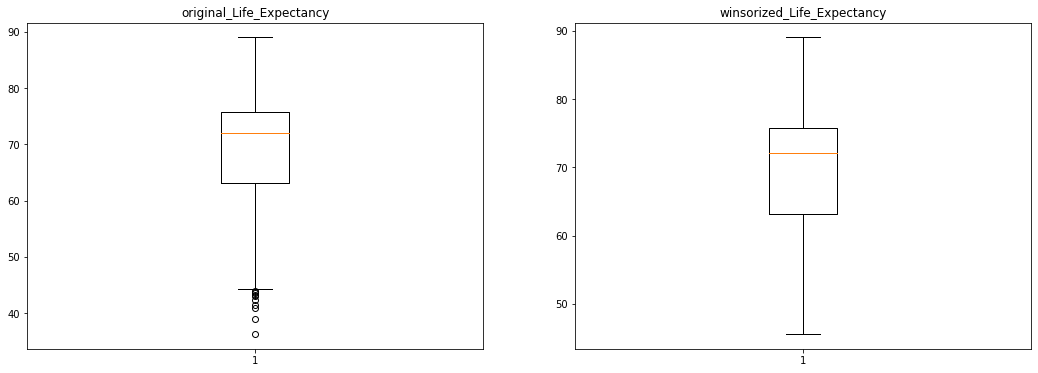

In [23]:
# Removing Outliers in the variables using Winsorization technique.
# Winsorize Life_Expectancy
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Life_Expectancy = le['Life_Expectancy']
plt.boxplot(original_Life_Expectancy)
plt.title("original_Life_Expectancy")

plt.subplot(1,2,2)
winsorized_Life_Expectancy = winsorize(le['Life_Expectancy'],(0.01,0))
plt.boxplot(winsorized_Life_Expectancy)
plt.title("winsorized_Life_Expectancy")

plt.show()

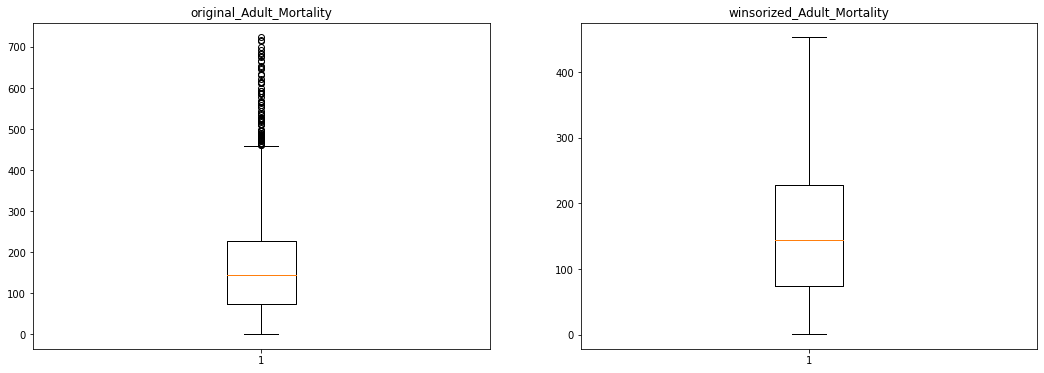

In [24]:
# Winsorize Adult_Mortality
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Adult_Mortality = le['Adult_Mortality']
plt.boxplot(original_Adult_Mortality)
plt.title("original_Adult_Mortality")

plt.subplot(1,2,2)
winsorized_Adult_Mortality = winsorize(le['Adult_Mortality'],(0,0.03))
plt.boxplot(winsorized_Adult_Mortality)
plt.title("winsorized_Adult_Mortality")

plt.show()

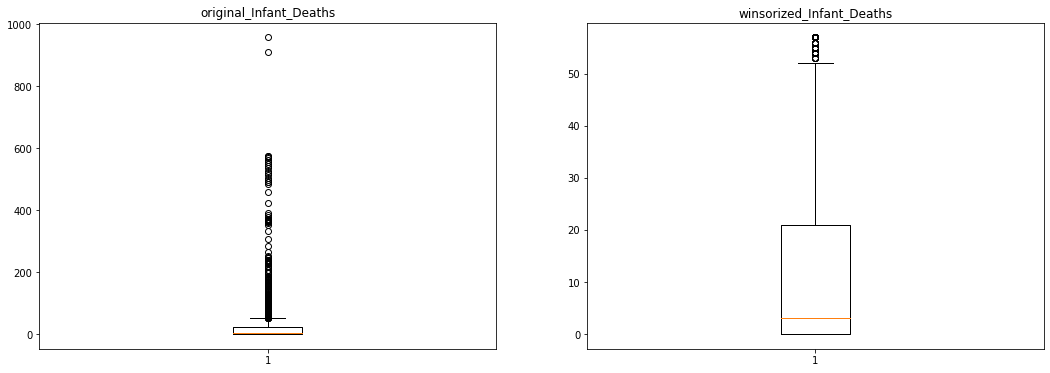

In [25]:
# Winsorize Infant_Deaths
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Infant_Deaths = le['Infant_Deaths']
plt.boxplot(original_Infant_Deaths)
plt.title("original_Infant_Deaths")

plt.subplot(1,2,2)
winsorized_Infant_Deaths = winsorize(le['Infant_Deaths'],(0,0.10))
plt.boxplot(winsorized_Infant_Deaths)
plt.title("winsorized_Infant_Deaths")

plt.show()

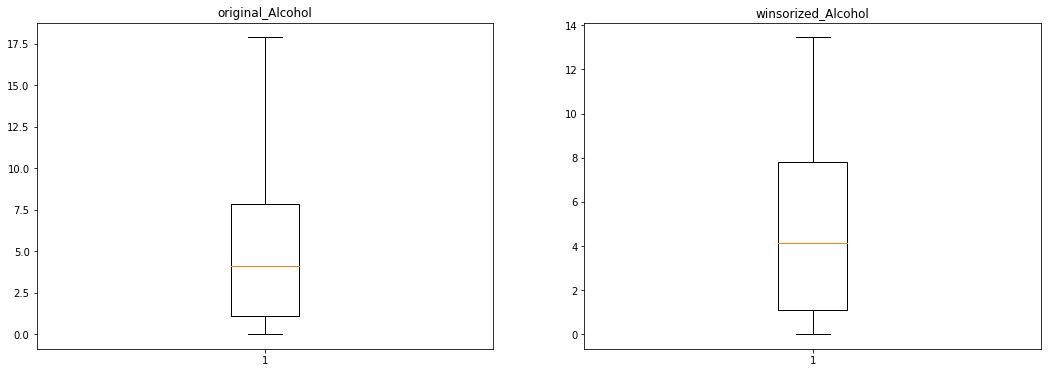

In [26]:
# Winsorize Alcohol
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Alcohol = le['Alcohol']
plt.boxplot(original_Alcohol)
plt.title("original_Alcohol")

plt.subplot(1,2,2)
winsorized_Alcohol = winsorize(le['Alcohol'],(0,0.01))
plt.boxplot(winsorized_Alcohol)
plt.title("winsorized_Alcohol")

plt.show()

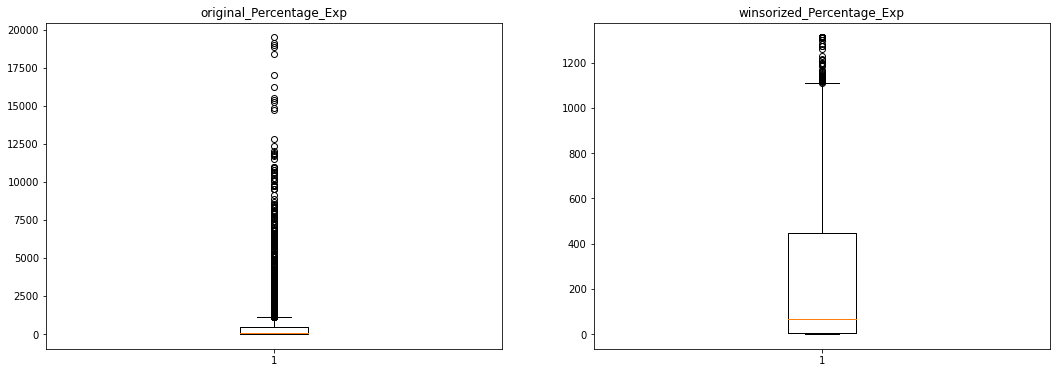

In [27]:
# Winsorize Percentage_Exp
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Percentage_Exp = le['Percentage_Exp']
plt.boxplot(original_Percentage_Exp)
plt.title("original_Percentage_Exp")

plt.subplot(1,2,2)
winsorized_Percentage_Exp = winsorize(le['Percentage_Exp'],(0,0.12))
plt.boxplot(winsorized_Percentage_Exp)
plt.title("winsorized_Percentage_Exp")

plt.show()

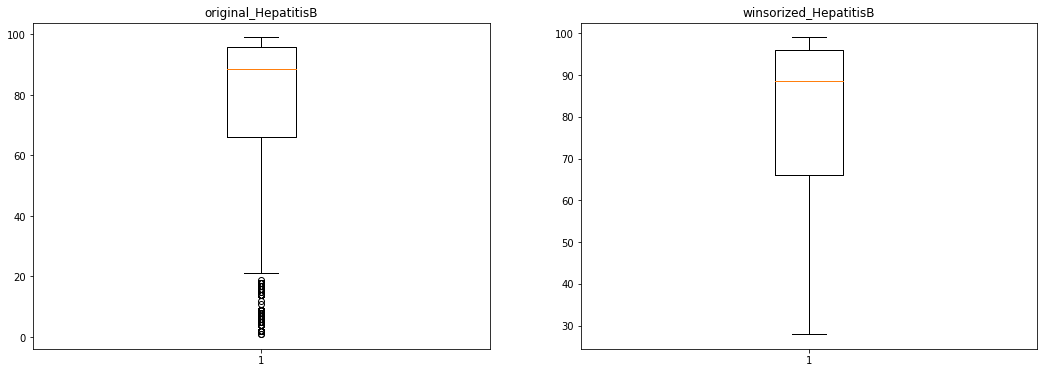

In [28]:
# Winsorize HepatitisB
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_HepatitisB = le['HepatitisB']
plt.boxplot(original_HepatitisB)
plt.title("original_HepatitisB")

plt.subplot(1,2,2)
winsorized_HepatitisB = winsorize(le['HepatitisB'],(0.11,0))
plt.boxplot(winsorized_HepatitisB)
plt.title("winsorized_HepatitisB")

plt.show()

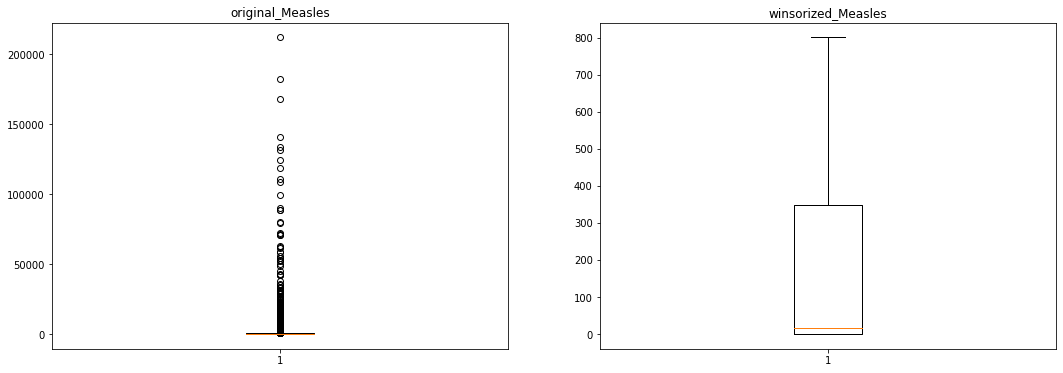

In [29]:
# Winsorize Measles
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Measles = le['Measles']
plt.boxplot(original_Measles)
plt.title("original_Measles")

plt.subplot(1,2,2)
winsorized_Measles = winsorize(le['Measles'],(0,0.19))
plt.boxplot(winsorized_Measles)
plt.title("winsorized_Measles")

plt.show()

<b>Winsorization changes 19% of the data, which may not give better results. Hence drop this column.

In [30]:
le = le.drop('Measles',axis=1)

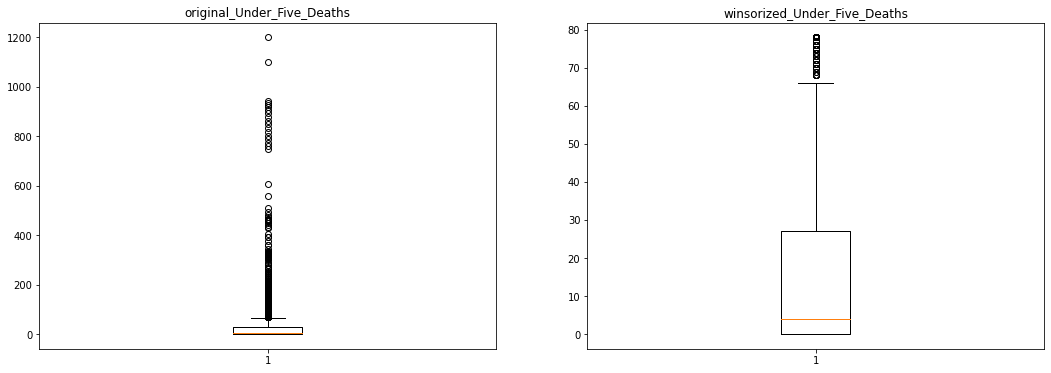

In [31]:
# Winsorize Under_Five_Deaths
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Under_Five_Deaths = le['Under_Five_Deaths']
plt.boxplot(original_Under_Five_Deaths)
plt.title("original_Under_Five_Deaths")

plt.subplot(1,2,2)
winsorized_Under_Five_Deaths = winsorize(le['Under_Five_Deaths'],(0,0.12))
plt.boxplot(winsorized_Under_Five_Deaths)
plt.title("winsorized_Under_Five_Deaths")

plt.show()

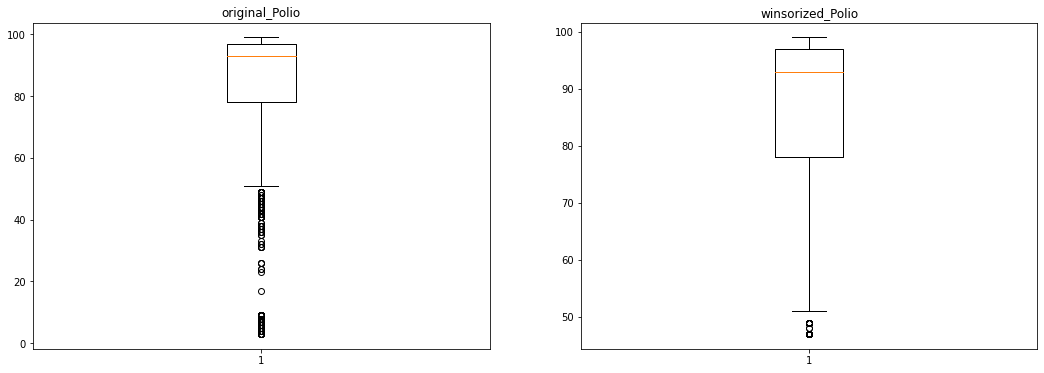

In [32]:
# Winsorize Polio
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Polio = le['Polio']
plt.boxplot(original_Polio)
plt.title("original_Polio")

plt.subplot(1,2,2)
winsorized_Polio = winsorize(le['Polio'],(0.09,0))
plt.boxplot(winsorized_Polio)
plt.title("winsorized_Polio")

plt.show()

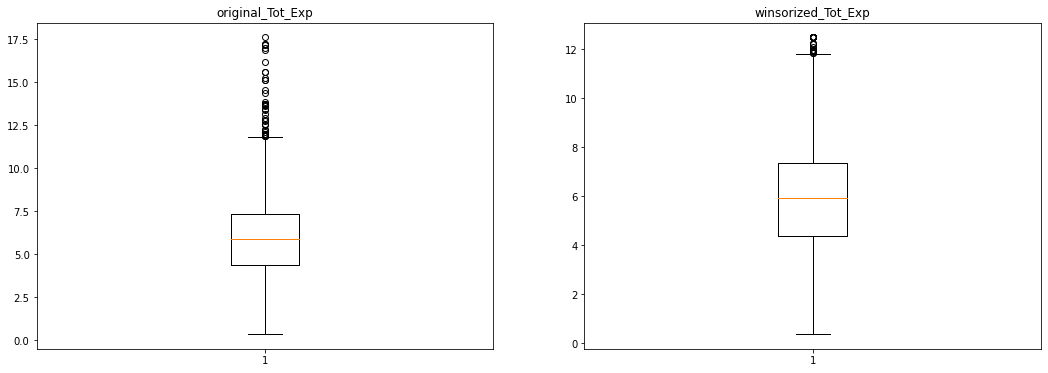

In [33]:
# Winsorize Tot_Exp
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Tot_Exp = le['Tot_Exp']
plt.boxplot(original_Tot_Exp)
plt.title("original_Tot_Exp")

plt.subplot(1,2,2)
winsorized_Tot_Exp = winsorize(le['Tot_Exp'],(0,0.01))
plt.boxplot(winsorized_Tot_Exp)
plt.title("winsorized_Tot_Exp")

plt.show()

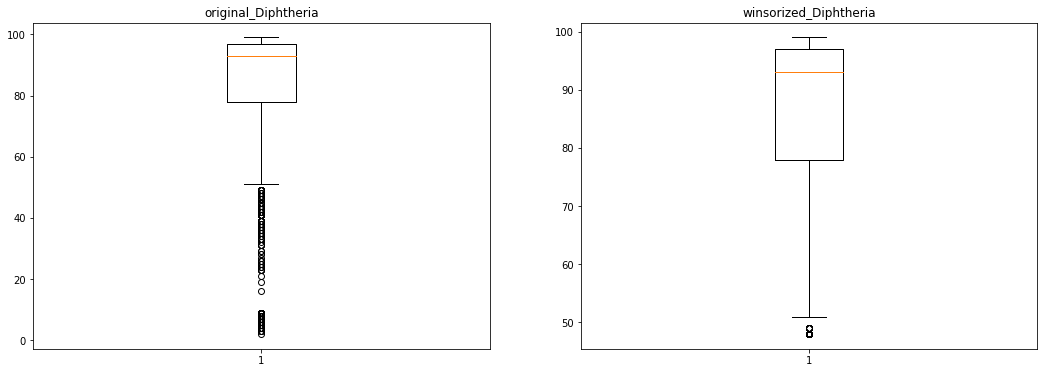

In [34]:
# Winsorize Diphtheria
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Diphtheria = le['Diphtheria']
plt.boxplot(original_Diphtheria)
plt.title("original_Diphtheria")

plt.subplot(1,2,2)
winsorized_Diphtheria = winsorize(le['Diphtheria'],(0.10,0))
plt.boxplot(winsorized_Diphtheria)
plt.title("winsorized_Diphtheria")

plt.show()

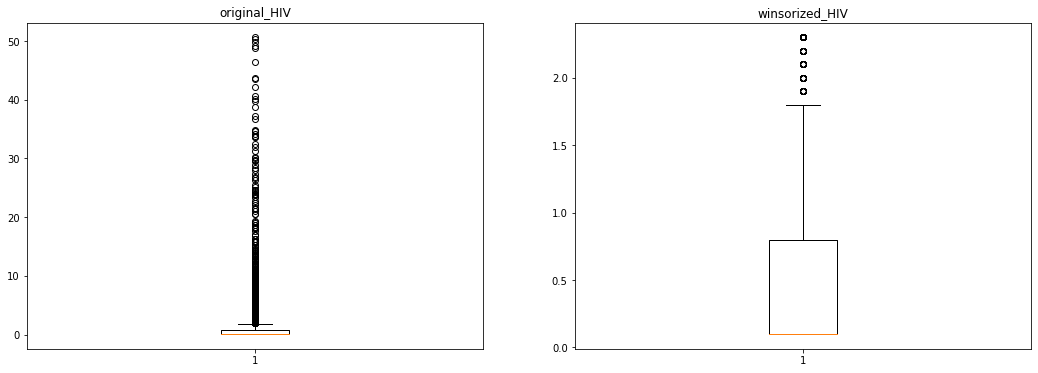

In [35]:
# Winsorize HIV/AIDS
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_HIV = le['HIV/AIDS']
plt.boxplot(original_HIV)
plt.title("original_HIV")

plt.subplot(1,2,2)
winsorized_HIV = winsorize(le['HIV/AIDS'],(0,0.16))
plt.boxplot(winsorized_HIV)
plt.title("winsorized_HIV")

plt.show()

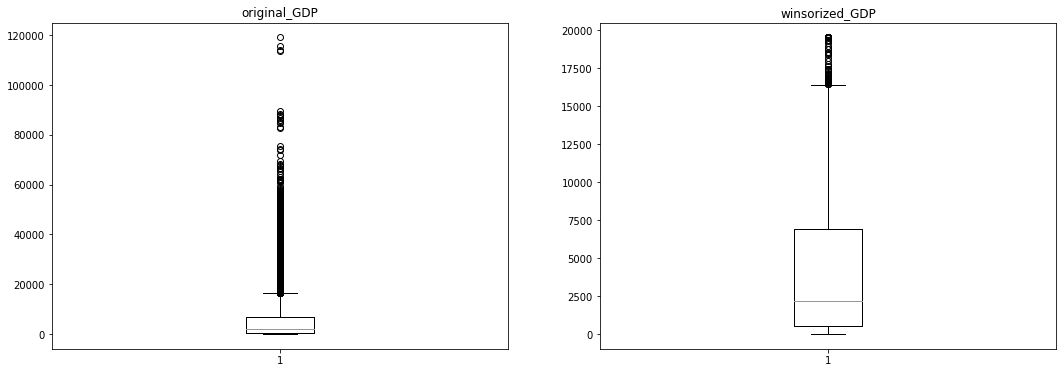

In [36]:
# Winsorize GDP
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_GDP = le['GDP']
plt.boxplot(original_GDP)
plt.title("original_GDP")

plt.subplot(1,2,2)
winsorized_GDP = winsorize(le['GDP'],(0,0.13))
plt.boxplot(winsorized_GDP)
plt.title("winsorized_GDP")

plt.show()

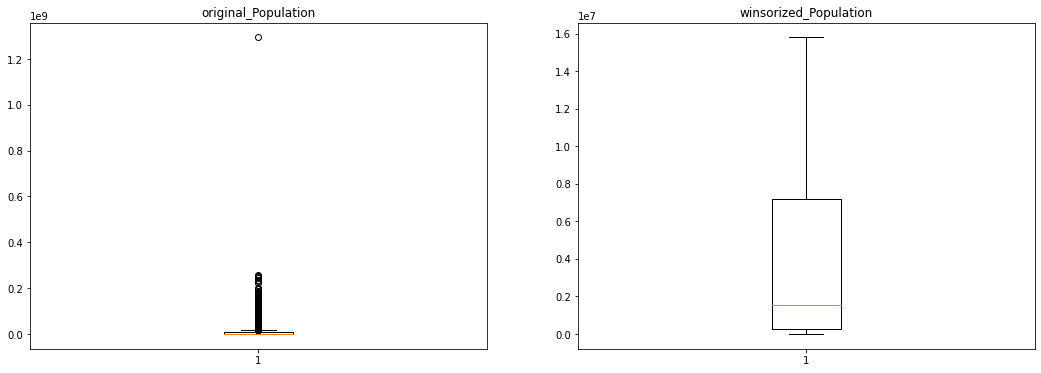

In [37]:
# Winsorize Population
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Population = le['Population']
plt.boxplot(original_Population)
plt.title("original_Population")

plt.subplot(1,2,2)
winsorized_Population = winsorize(le['Population'],(0,0.14))
plt.boxplot(winsorized_Population)
plt.title("winsorized_Population")

plt.show()

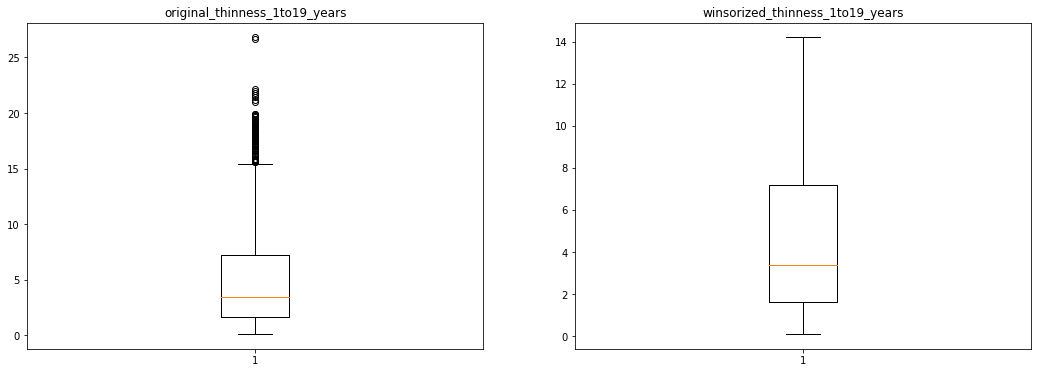

In [38]:
# Winsorize thinness_1to19_years
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_thinness_1to19_years = le['thinness_1to19_years']
plt.boxplot(original_thinness_1to19_years)
plt.title("original_thinness_1to19_years")

plt.subplot(1,2,2)
winsorized_thinness_1to19_years = winsorize(le['thinness_1to19_years'],(0,0.04))
plt.boxplot(winsorized_thinness_1to19_years)
plt.title("winsorized_thinness_1to19_years")

plt.show()

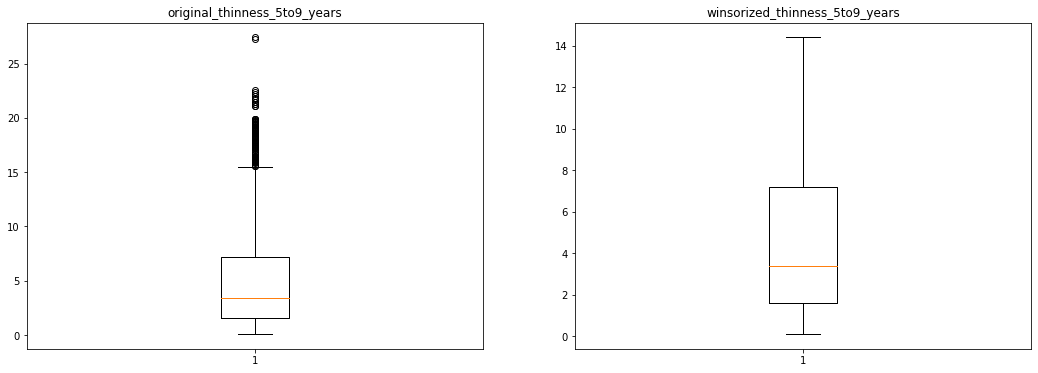

In [39]:
# Winsorize thinness_5to9_years
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_thinness_5to9_years = le['thinness_5to9_years']
plt.boxplot(original_thinness_5to9_years)
plt.title("original_thinness_5to9_years")

plt.subplot(1,2,2)
winsorized_thinness_5to9_years = winsorize(le['thinness_5to9_years'],(0,0.04))
plt.boxplot(winsorized_thinness_5to9_years)
plt.title("winsorized_thinness_5to9_years")

plt.show()

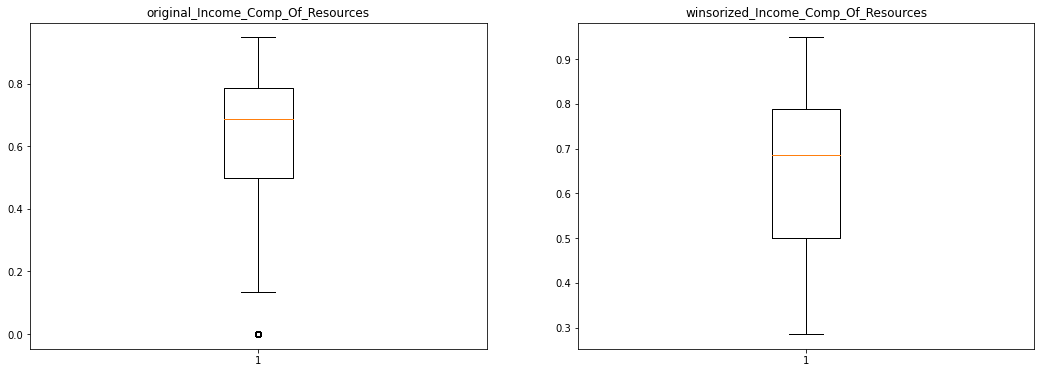

In [40]:
# Winsorize Income_Comp_Of_Resources
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Income_Comp_Of_Resources = le['Income_Comp_Of_Resources']
plt.boxplot(original_Income_Comp_Of_Resources)
plt.title("original_Income_Comp_Of_Resources")

plt.subplot(1,2,2)
winsorized_Income_Comp_Of_Resources = winsorize(le['Income_Comp_Of_Resources'],(0.05,0))
plt.boxplot(winsorized_Income_Comp_Of_Resources)
plt.title("winsorized_Income_Comp_Of_Resources")

plt.show()

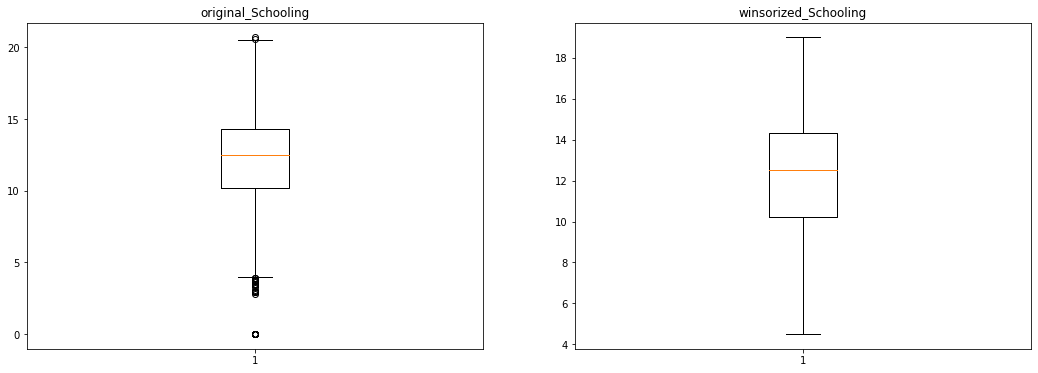

In [41]:
# Winsorize Schooling
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Schooling = le['Schooling']
plt.boxplot(original_Schooling)
plt.title("original_Schooling")

plt.subplot(1,2,2)
winsorized_Schooling = winsorize(le['Schooling'],(0.02,0.01))
plt.boxplot(winsorized_Schooling)
plt.title("winsorized_Schooling")

plt.show()

In [42]:
# Check number of Outliers after Winsorization for each variable.
win_list = [winsorized_Life_Expectancy,winsorized_Adult_Mortality,winsorized_Infant_Deaths,winsorized_Alcohol,
            winsorized_Percentage_Exp,winsorized_HepatitisB,winsorized_Under_Five_Deaths,winsorized_Polio,winsorized_Tot_Exp,winsorized_Diphtheria,winsorized_HIV,winsorized_GDP,winsorized_Population,winsorized_thinness_1to19_years,winsorized_thinness_5to9_years,winsorized_Income_Comp_Of_Resources,winsorized_Schooling]

k = list(col_dict.keys())
i = 0
for variable in win_list:
    q75, q25 = np.percentile(variable, [75 ,25])
    iqr = q75 - q25
    
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Number of outliers in {} after winsorization : {}".format(k[i] , len(np.where((variable > max_val) | (variable < min_val))[0])))
    i += 1
    
    

Number of outliers in Life_Expectancy after winsorization : 0
Number of outliers in Adult_Mortality after winsorization : 0
Number of outliers in Infant_Deaths after winsorization : 331
Number of outliers in Alcohol after winsorization : 0
Number of outliers in Percentage_Exp after winsorization : 385
Number of outliers in HepatitisB after winsorization : 0
Number of outliers in Measles after winsorization : 392
Number of outliers in BMI after winsorization : 286
Number of outliers in Under_Five_Deaths after winsorization : 43
Number of outliers in Polio after winsorization : 302
Number of outliers in Tot_Exp after winsorization : 542
Number of outliers in Diphtheria after winsorization : 422
Number of outliers in HIV/AIDS after winsorization : 0
Number of outliers in GDP after winsorization : 0
Number of outliers in Population after winsorization : 0
Number of outliers in thinness_1to19_years after winsorization : 0
Number of outliers in thinness_5to9_years after winsorization : 0


In [43]:
# Adding winsorized variables to the data frame.
le['winsorized_Life_Expectancy'] = winsorized_Life_Expectancy
le['winsorized_Adult_Mortality'] = winsorized_Adult_Mortality
le['winsorized_Infant_Deaths'] = winsorized_Infant_Deaths
le['winsorized_Alcohol'] = winsorized_Alcohol
le['winsorized_Percentage_Exp'] = winsorized_Percentage_Exp
le['winsorized_HepatitisB'] = winsorized_HepatitisB
le['winsorized_Under_Five_Deaths'] = winsorized_Under_Five_Deaths
le['winsorized_Polio'] = winsorized_Polio
le['winsorized_Tot_Exp'] = winsorized_Tot_Exp
le['winsorized_Diphtheria'] = winsorized_Diphtheria
le['winsorized_HIV'] = winsorized_HIV
le['winsorized_GDP'] = winsorized_GDP
le['winsorized_Population'] = winsorized_Population
le['winsorized_thinness_1to19_years'] = winsorized_thinness_1to19_years
le['winsorized_thinness_5to9_years'] = winsorized_thinness_5to9_years
le['winsorized_Income_Comp_Of_Resources'] = winsorized_Income_Comp_Of_Resources
le['winsorized_Schooling'] = winsorized_Schooling


<b>Exploratory Analysis:

In [44]:
# Descriptive statistics of continuous variables.
le.describe()

,Year,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,BMI,Under_Five_Deaths,Polio,...,winsorized_Polio,winsorized_Tot_Exp,winsorized_Diphtheria,winsorized_HIV,winsorized_GDP,winsorized_Population,winsorized_thinness_1to19_years,winsorized_thinness_5to9_years,winsorized_Income_Comp_Of_Resources,winsorized_Schooling
count,2914.000000,2914.000000,2914.000000,2914.000000,2914.000000,2914.000000,2914.000000,2914.000000,2914.000000,2914.000000,...,2914.000000,2914.000000,2914.000000,2914.000000,2914.000000,2.914000e+03,2914.000000,2914.000000,2914.000000,2914.000000
mean,2007.504804,69.245093,164.908717,23.690117,4.760333,743.725144,76.012697,38.381537,33.219286,82.376458,...,84.978037,5.909501,84.991764,0.616575,5290.788391,4.500627e+06,4.650034,4.670075,0.647843,12.136874
std,4.612645,9.541639,124.418021,65.208507,3.985748,1995.101045,28.034059,19.866578,92.329064,23.652464,...,16.469287,2.325087,16.269759,0.845673,6638.964366,5.639018e+06,3.784950,3.820213,0.177022,3.149146
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,1.000000,0.000000,3.000000,...,47.000000,0.370000,48.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.286000,4.500000
25%,2004.000000,63.100000,74.000000,0.000000,1.102500,4.736397,66.000000,19.500000,0.000000,78.000000,...,78.000000,4.360000,78.000000,0.100000,528.381073,2.893995e+05,1.600000,1.600000,0.500250,10.200000
50%,2008.000000,72.100000,144.000000,3.000000,4.120000,67.031563,88.583333,43.500000,4.000000,93.000000,...,93.000000,5.910000,93.000000,0.100000,2182.856837,1.532980e+06,3.400000,3.400000,0.686000,12.500000
75%,2012.000000,75.700000,228.000000,21.000000,7.827500,446.887709,96.000000,56.100000,27.000000,97.000000,...,97.000000,7.357500,97.000000,0.800000,6885.508174,7.182362e+06,7.200000,7.200000,0.788000,14.343750
max,2015.000000,89.000000,723.000000,957.000000,17.870000,19479.911610,99.000000,77.600000,1200.000000,99.000000,...,99.000000,12.490000,99.000000,2.300000,19517.841680,1.579954e+07,14.200000,14.400000,0.948000,19.000000


> <b>Univariate Analysis

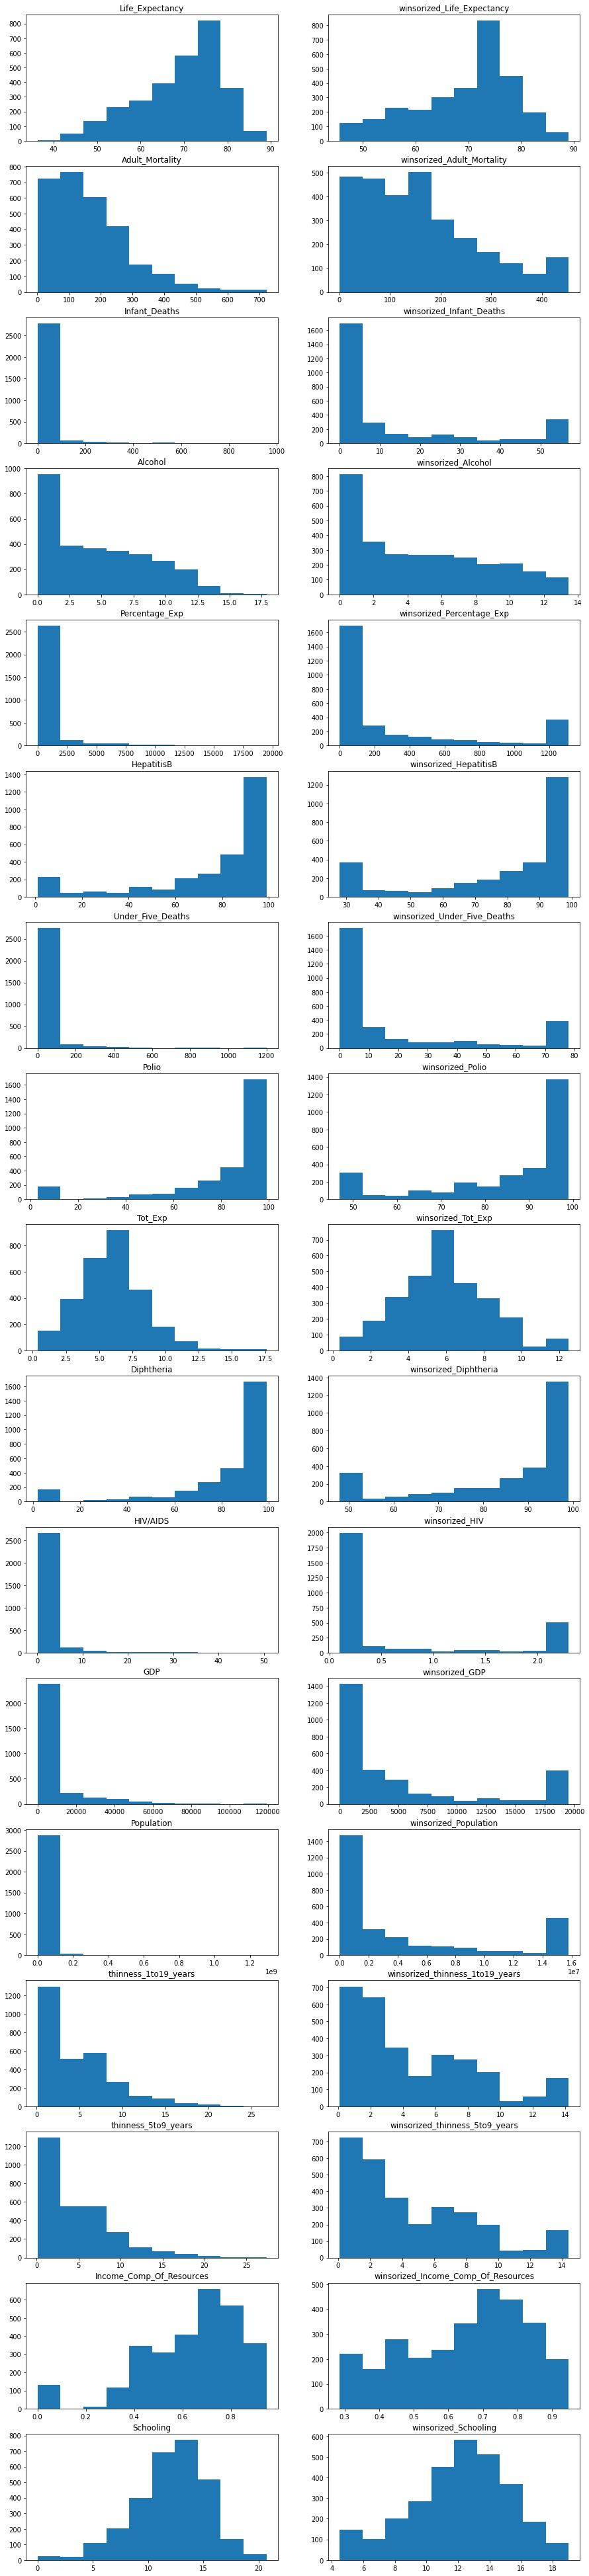

In [45]:
# Distribution of each numerical variable.
all_col = ['Life_Expectancy','winsorized_Life_Expectancy','Adult_Mortality','winsorized_Adult_Mortality','Infant_Deaths',
         'winsorized_Infant_Deaths','Alcohol','winsorized_Alcohol','Percentage_Exp','winsorized_Percentage_Exp','HepatitisB',
         'winsorized_HepatitisB','Under_Five_Deaths','winsorized_Under_Five_Deaths','Polio','winsorized_Polio','Tot_Exp',
         'winsorized_Tot_Exp','Diphtheria','winsorized_Diphtheria','HIV/AIDS','winsorized_HIV','GDP','winsorized_GDP',
         'Population','winsorized_Population','thinness_1to19_years','winsorized_thinness_1to19_years','thinness_5to9_years',
         'winsorized_thinness_5to9_years','Income_Comp_Of_Resources','winsorized_Income_Comp_Of_Resources',
         'Schooling','winsorized_Schooling']

plt.figure(figsize=(15,75))

for i in range(len(all_col)):
    plt.subplot(18,2,i+1)
    plt.hist(le[all_col[i]])
    plt.title(all_col[i])

plt.show()

    

winsorized_Life_Expectancy, winsorized_Tot_Exp, winsorized_Schooling are some what normally distributed.

In [46]:
# Descriptive statistics of categorical variables.
le.describe(include=['O'])

,Country,Status
count,2914,2914
unique,183,2
top,Afghanistan,Developing
freq,16,2402


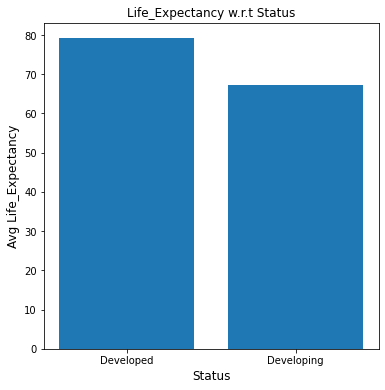

In [47]:
# Life_Expectancy w.r.t Status using bar plot.
plt.figure(figsize=(6,6))
plt.bar(le.groupby('Status')['Status'].count().index,le.groupby('Status')['winsorized_Life_Expectancy'].mean())
plt.xlabel("Status",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.title("Life_Expectancy w.r.t Status")
plt.show()

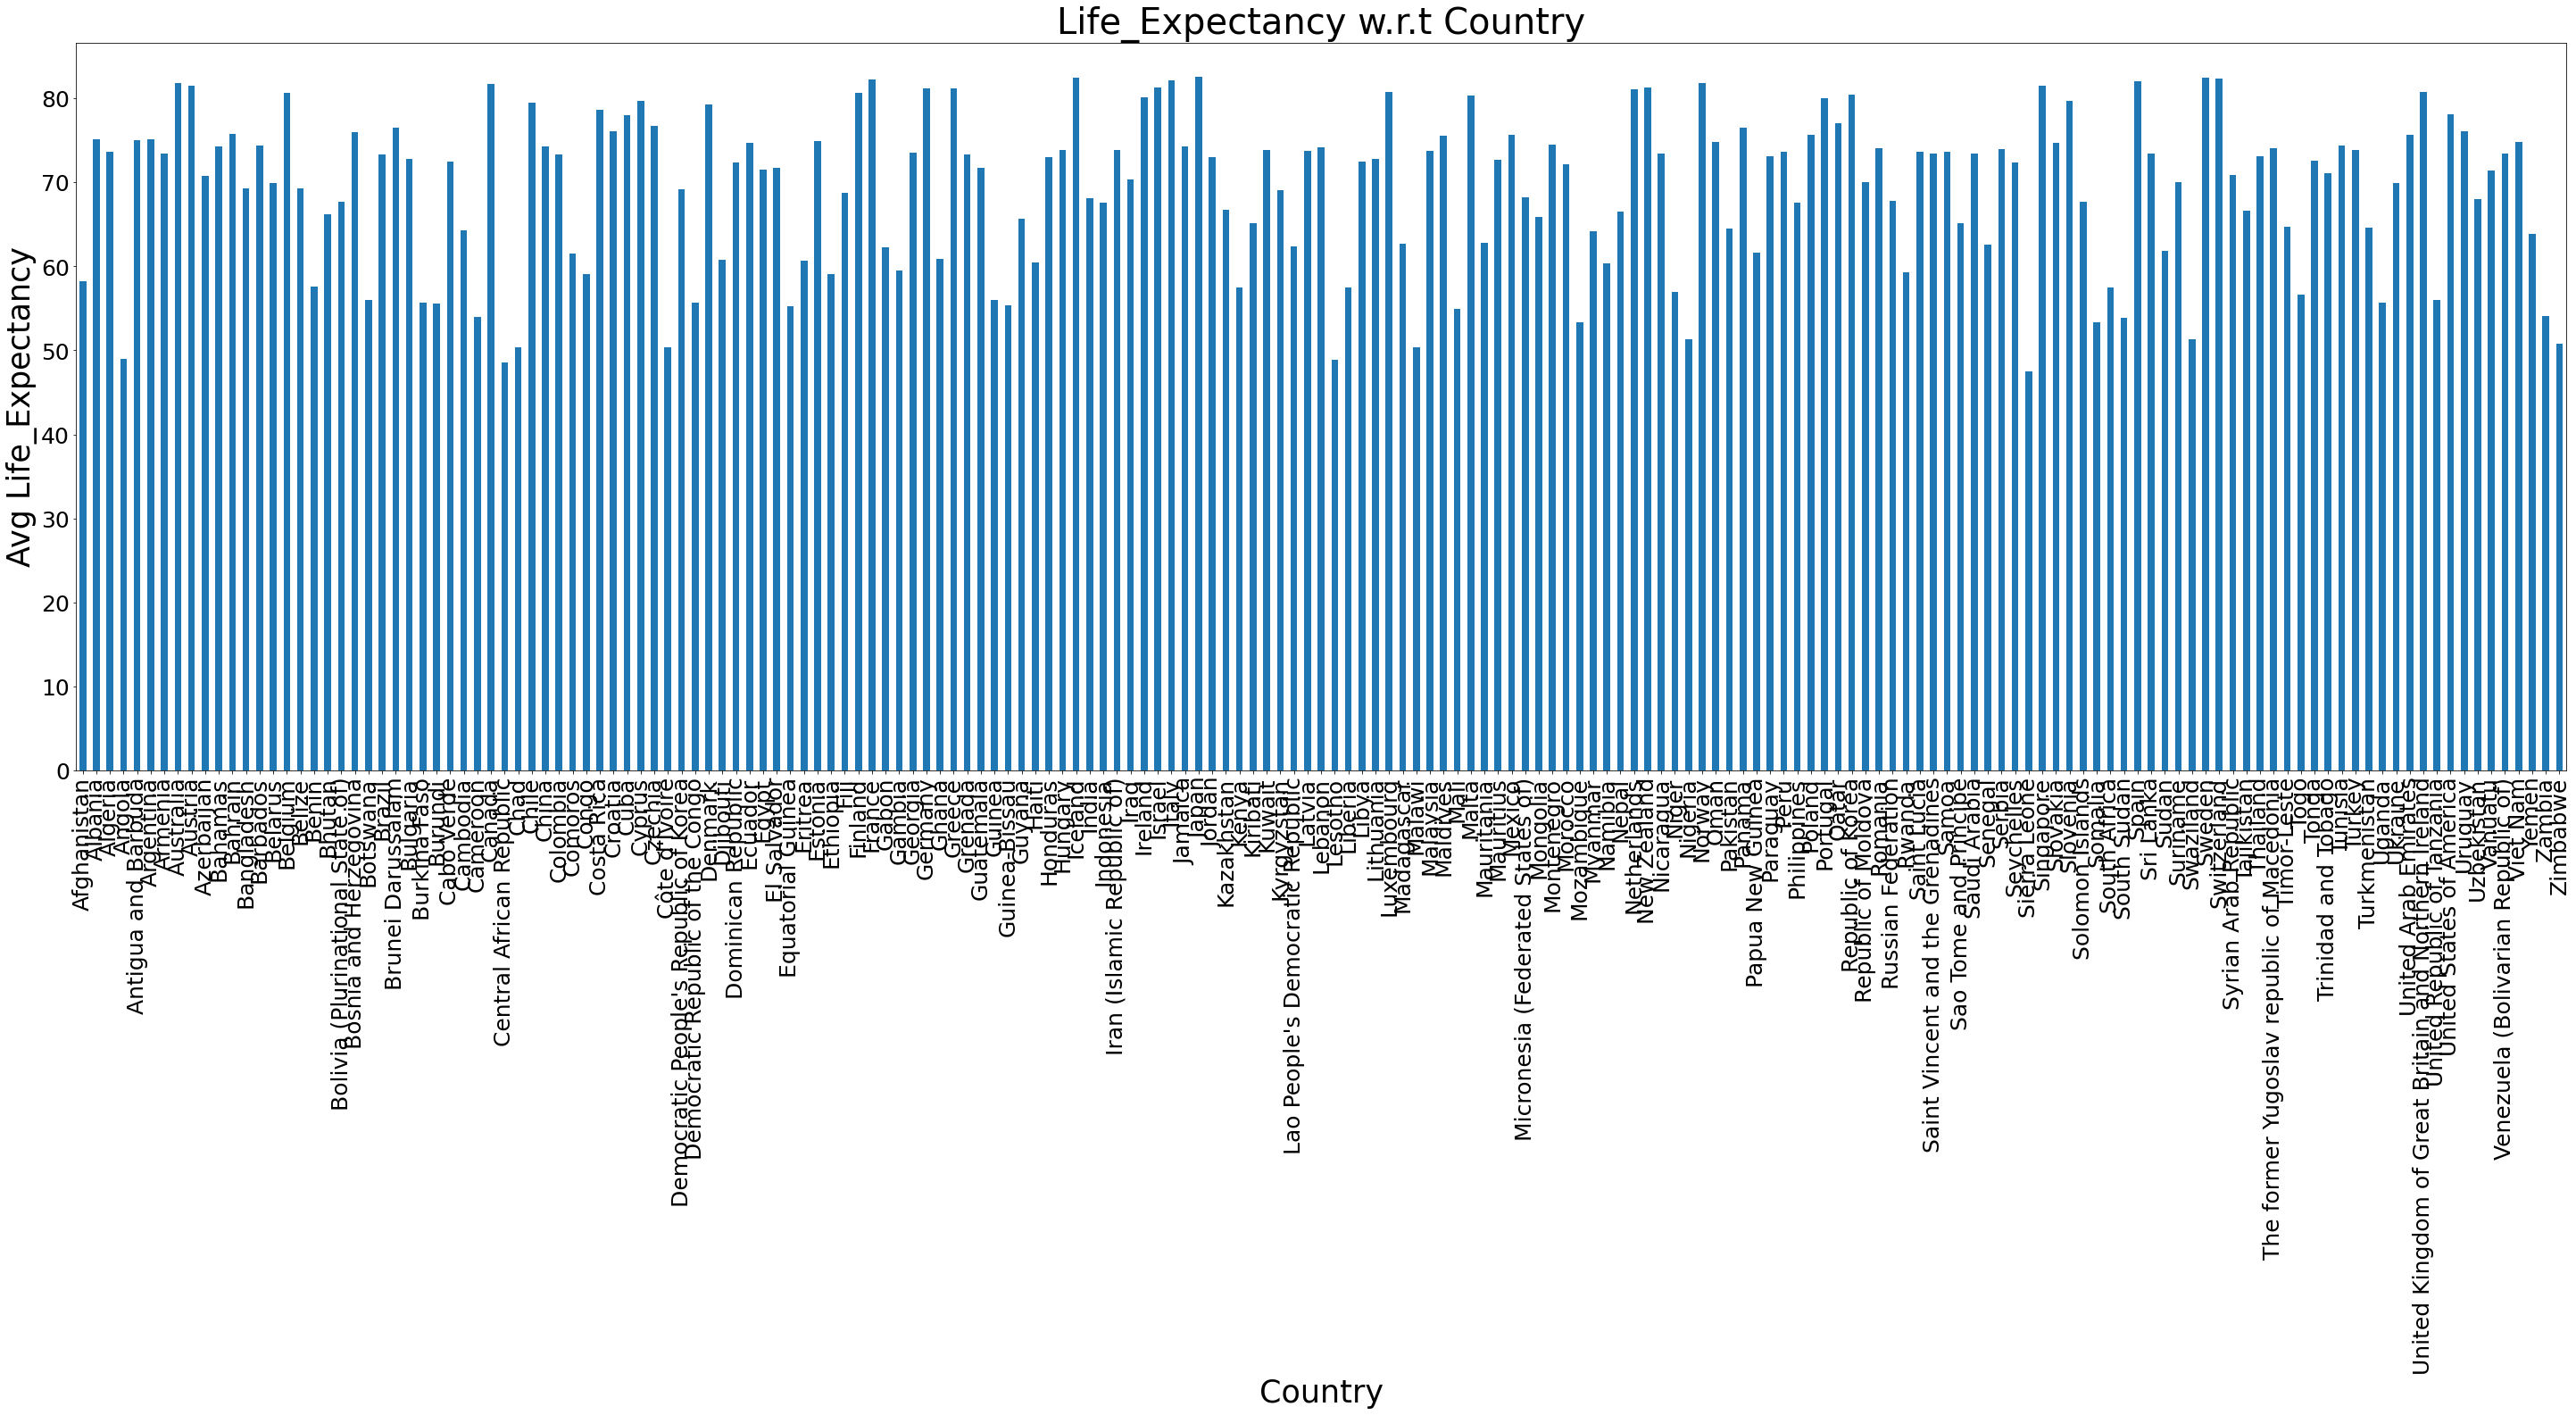

In [63]:
# Life_Expectancy w.r.t Country using bar plot.
le_country = le.groupby('Country')['winsorized_Life_Expectancy'].mean()
le_country.plot(kind='bar', figsize=(50,15), fontsize=25)
plt.title("Life_Expectancy w.r.t Country",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Avg Life_Expectancy",fontsize=35)
plt.show()

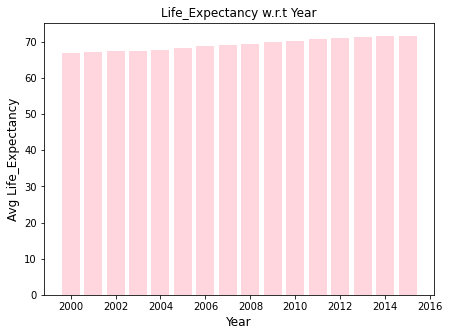

In [49]:
# Life_Expectancy w.r.t Year using bar plot.
plt.figure(figsize=(7,5))
plt.bar(le.groupby('Year')['Year'].count().index,le.groupby('Year')['winsorized_Life_Expectancy'].mean(),color='pink',alpha=0.65)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.title("Life_Expectancy w.r.t Year")
plt.show()

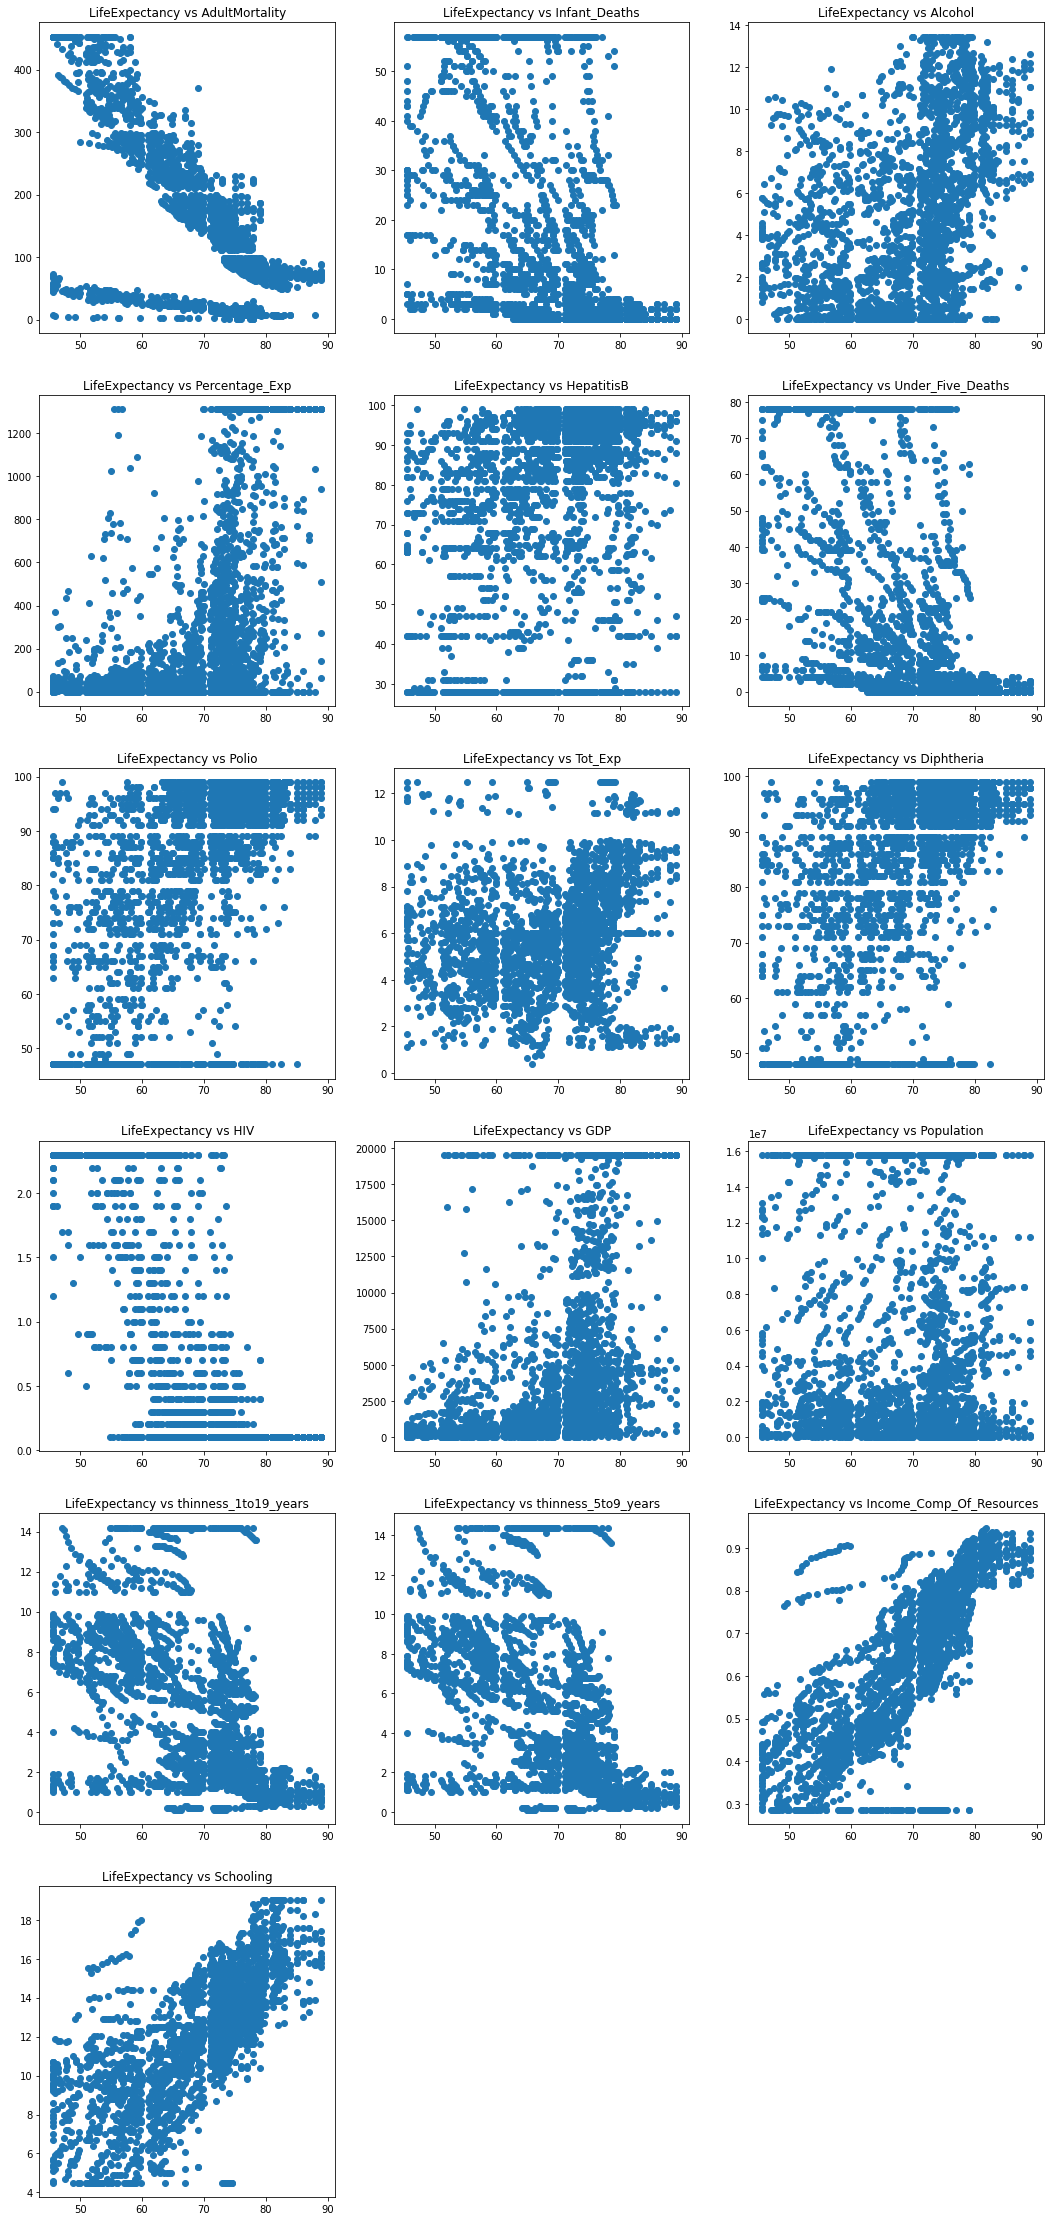

In [50]:
# Scatter plot between the target variable(winsorized_Life_Expectancy) and all continuous variables.
plt.figure(figsize=(18,40))

plt.subplot(6,3,1)
plt.scatter(le["winsorized_Life_Expectancy"], le["winsorized_Adult_Mortality"])
plt.title("LifeExpectancy vs AdultMortality")

plt.subplot(6,3,2)
plt.scatter(le["winsorized_Life_Expectancy"], le["winsorized_Infant_Deaths"])
plt.title("LifeExpectancy vs Infant_Deaths")

plt.subplot(6,3,3)
plt.scatter(le["winsorized_Life_Expectancy"], le["winsorized_Alcohol"])
plt.title("LifeExpectancy vs Alcohol")

plt.subplot(6,3,4)
plt.scatter(le["winsorized_Life_Expectancy"], le["winsorized_Percentage_Exp"])
plt.title("LifeExpectancy vs Percentage_Exp")

plt.subplot(6,3,5)
plt.scatter(le["winsorized_Life_Expectancy"], le["winsorized_HepatitisB"])
plt.title("LifeExpectancy vs HepatitisB")

plt.subplot(6,3,6)
plt.scatter(le["winsorized_Life_Expectancy"], le["winsorized_Under_Five_Deaths"])
plt.title("LifeExpectancy vs Under_Five_Deaths")

plt.subplot(6,3,7)
plt.scatter(le["winsorized_Life_Expectancy"], le["winsorized_Polio"])
plt.title("LifeExpectancy vs Polio")

plt.subplot(6,3,8)
plt.scatter(le["winsorized_Life_Expectancy"], le["winsorized_Tot_Exp"])
plt.title("LifeExpectancy vs Tot_Exp")

plt.subplot(6,3,9)
plt.scatter(le["winsorized_Life_Expectancy"], le["winsorized_Diphtheria"])
plt.title("LifeExpectancy vs Diphtheria")

plt.subplot(6,3,10)
plt.scatter(le["winsorized_Life_Expectancy"], le["winsorized_HIV"])
plt.title("LifeExpectancy vs HIV")

plt.subplot(6,3,11)
plt.scatter(le["winsorized_Life_Expectancy"], le["winsorized_GDP"])
plt.title("LifeExpectancy vs GDP")

plt.subplot(6,3,12)
plt.scatter(le["winsorized_Life_Expectancy"], le["winsorized_Population"])
plt.title("LifeExpectancy vs Population")

plt.subplot(6,3,13)
plt.scatter(le["winsorized_Life_Expectancy"], le["winsorized_thinness_1to19_years"])
plt.title("LifeExpectancy vs thinness_1to19_years")

plt.subplot(6,3,14)
plt.scatter(le["winsorized_Life_Expectancy"], le["winsorized_thinness_5to9_years"])
plt.title("LifeExpectancy vs thinness_5to9_years")

plt.subplot(6,3,15)
plt.scatter(le["winsorized_Life_Expectancy"], le["winsorized_Income_Comp_Of_Resources"])
plt.title("LifeExpectancy vs Income_Comp_Of_Resources")

plt.subplot(6,3,16)
plt.scatter(le["winsorized_Life_Expectancy"], le["winsorized_Schooling"])
plt.title("LifeExpectancy vs Schooling")


plt.show()

<b>Observation:</b><br/>
Life_Expectancy has somewhat Negative relationship with AdultMortality.<br/>
Life_Expectancy has positive relationship with Income_Comp_Of_Resources and Schooling.

Let us observe if there exists any correlation among the variables that are related to the target variable(winsorized_Life_Expectancy).

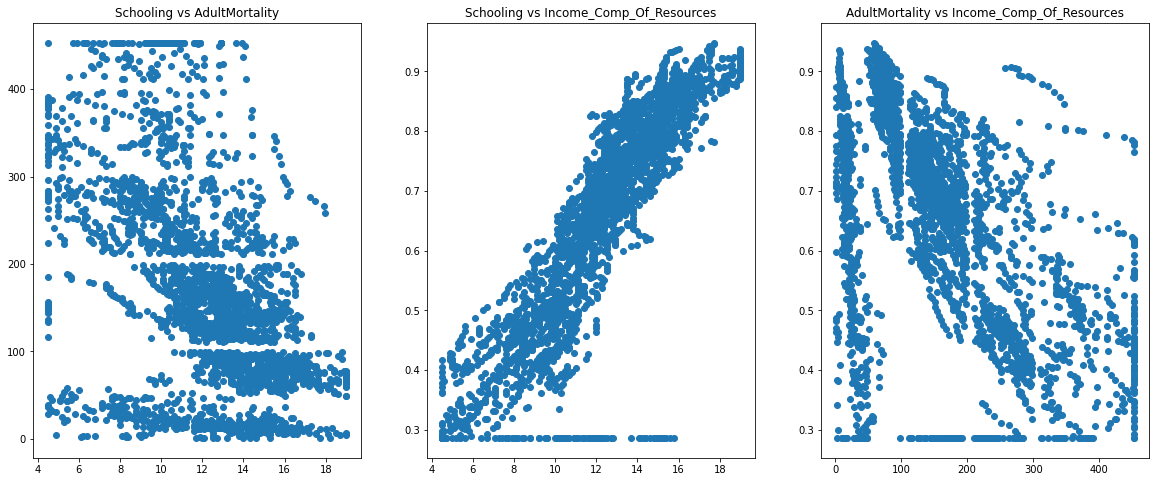

In [51]:
plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
plt.scatter(le["winsorized_Schooling"], le["winsorized_Adult_Mortality"])
plt.title("Schooling vs AdultMortality")

plt.subplot(1,3,2)
plt.scatter(le["winsorized_Schooling"], le["winsorized_Income_Comp_Of_Resources"])
plt.title("Schooling vs Income_Comp_Of_Resources")

plt.subplot(1,3,3)
plt.scatter(le["winsorized_Adult_Mortality"], le["winsorized_Income_Comp_Of_Resources"])
plt.title("AdultMortality vs Income_Comp_Of_Resources")

plt.show()

Looks like all these variables have inter-relation. Let us confirm this using correlation heatmap.

In [52]:
# Correlation of winsorized variables
le_win = le.iloc[:,21:]
le_win['Country'] = le['Country']
le_win['Year'] = le['Year']
le_win['Status'] = le['Status']
le_win_num = le_win.iloc[:,:-3]
cormat = le_win_num.corr()

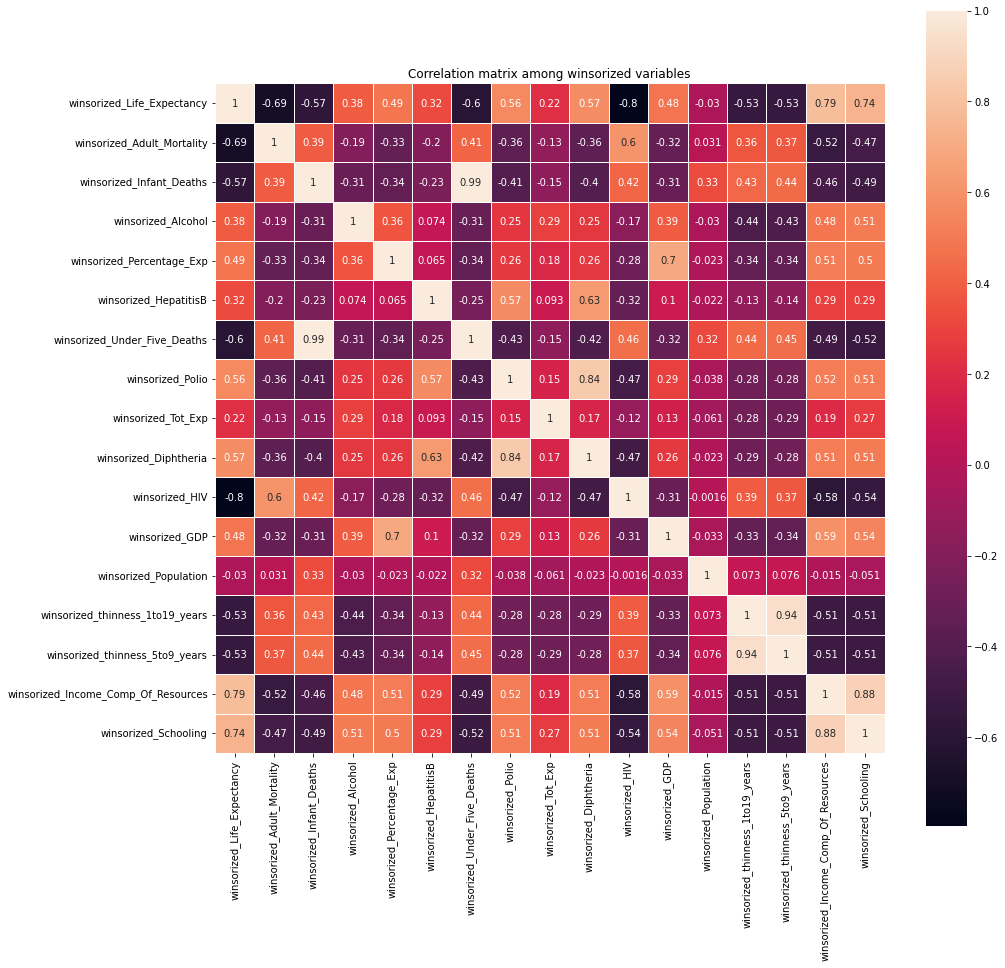

In [53]:
# Using heatmap to observe correlations.
import seaborn as sns

plt.figure(figsize=(15,15))
sns.heatmap(cormat, square=True, annot=True, linewidths=.5)
plt.title("Correlation matrix among winsorized variables")
plt.show()

<b>Observations:</b><br/>
- winsorized_Income_Comp_Of_Resources is correlated with winsorized_Schooling. <br/>
- winsorized_thinness_1to19_years and winsorized_thinness_5to9_years are correlated. <br/>
- winsorized_Polio and winsorized_Diphtheria are correlated. <br/>
- winsorized_Percentage_Exp and winsorized_GDP are correlated. <br/>
- winsorized_Income_Comp_Of_Resources and <b>winsorized_Life_Expectancy</b> are correlated. <br/>
- <b>winsorized_Life_Expectancy</b> and winsorized_Schooling are correlated. <br/>
- winsorized_Infant_Deaths and winsorized_Under_Five_Deaths are correlated. <br/>
- winsorized_HIV has negative relation with <b>winsorized_Life_Expectancy</b>. <br/>
- winsorized_Adult_Mortality has negative relation with <b>winsorized_Life_Expectancy</b>. <br/>

<b>Feature engineering:

In [54]:
round(le[['Status','Life_Expectancy']].groupby(['Status']).mean(),2)

,Life_Expectancy
Status,
Developed,79.20
Developing,67.12


From the above, developed countries have higher average Life_Expectancy compared to Developing.<br/>
Let us find out statistically if this difference is significant.

In [55]:
# Finding the significance of difference of Average_Life_Expectancy between Developed and Developing countries using 
# t-test
import scipy.stats as stats
stats.ttest_ind(le.loc[le['Status']=='Developed','Life_Expectancy'],le.loc[le['Status']=='Developing','Life_Expectancy'])

Ttest_indResult(statistic=29.65913386289745, pvalue=3.740380061854714e-169)

![](http://)<b>p value is < 0.05<br/>
Hence, the difference of Average_Life_Expectancy between Developed and Developing countries is significant. We can consider 'Status' as a feature as it is related to Life Expectancy.

Let us create a new data frame with feature columns correlated to Life_Expectancy. As per the correlation heatmap, it<br/> is clear that the following fields are correlated with winsorized_Life_Expectancy.<br/>

- winsorized_Schooling<br/>
- winsorized_Income_Comp_Of_Resources<br/>
- winsorized_HIV<br/>
- winsorized_Adult_Mortality<br/>

Also it is to be noticed that winsorized_Income_Comp_Of_Resources is correlated with winsorized_Schooling.<br/>
All the features should NOT be inter related and hence let us eliminate one of these based on the correlation<br/> value w.r.t winsorized_Life_Expectancy.<br/>

- winsorized_Income_Comp_Of_Resources corr with winsorized_Life_Expectancy = 0.82<br/>
- winsorized_Schooling corr with winsorized_Life_Expectancy = 0.76<br/>

Let us eliminate winsorized_Schooling as it has relatively low correlation factor. Also, we can choose 'Status' as an important feature based on the above analysis.

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn import datasets
k = ['winsorized_Life_Expectancy',
 'winsorized_Adult_Mortality',
 'winsorized_Infant_Deaths',
 'winsorized_Alcohol',
 'winsorized_Percentage_Exp',
 'winsorized_HepatitisB',
 'winsorized_Under_Five_Deaths',
 'winsorized_Polio',
 'winsorized_Tot_Exp',
 'winsorized_Diphtheria',
 'winsorized_HIV',
 'winsorized_GDP',
 'winsorized_Population',
 'winsorized_thinness_1to19_years',
 'winsorized_thinness_5to9_years',
 'winsorized_Income_Comp_Of_Resources',
 'winsorized_Schooling']
lreg = RandomForestRegressor(  max_features=int(110.0/100),
                        n_estimators=int(60.0),
                        max_depth=int(25.0),
                        min_samples_leaf=int(30.0))
rfe = lreg
rfe = rfe.fit(le[k], le["Life_Expectancy"])
pd.DataFrame(
    zip(le[k].columns, abs(rfe.feature_importances_)),
    columns=["feature", "weight"],
).sort_values("weight").reset_index(drop=True)

,feature,weight
0,winsorized_Population,0.006040
1,winsorized_Tot_Exp,0.016067
2,winsorized_HepatitisB,0.020735
3,winsorized_Alcohol,0.021114
4,winsorized_Polio,0.033745
5,winsorized_Infant_Deaths,0.038593
6,winsorized_GDP,0.043879
7,winsorized_thinness_1to19_years,0.047887
8,winsorized_Under_Five_Deaths,0.052844
9,winsorized_Diphtheria,0.054255


We will remove HIV this causes a bias in the dataset. The  Countries where HIV is prevalent i.e (African Countries) are also the countries with low life expectency and doesn't necessarily directly correlate to life expectency

In [57]:
le = le.drop("winsorized_HIV" , axis = 1)

We will pick the top 6 and take infant deaths instead of polio since the two are highly correlated

In [58]:
important_features = ["winsorized_Adult_Mortality" , "winsorized_Schooling" , "winsorized_Diphtheria" , "winsorized_Percentage_Exp" , "winsorized_Infant_Deaths" , "winsorized_GDP","winsorized_Income_Comp_Of_Resources","winsorized_Tot_Exp","winsorized_thinness_5to9_years","winsorized_thinness_1to19_years"]

In [59]:
le.to_csv("data.csv" , index = False)
le

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,BMI,...,winsorized_Under_Five_Deaths,winsorized_Polio,winsorized_Tot_Exp,winsorized_Diphtheria,winsorized_GDP,winsorized_Population,winsorized_thinness_1to19_years,winsorized_thinness_5to9_years,winsorized_Income_Comp_Of_Resources,winsorized_Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,19.1,...,78,47.0,8.16,65.0,584.259210,15799542.0,14.2,14.4,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,18.6,...,78,58.0,8.18,62.0,612.696514,327582.0,14.2,14.4,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,18.1,...,78,62.0,8.13,64.0,631.744976,15799542.0,14.2,14.4,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,17.6,...,78,67.0,8.52,67.0,669.959000,3696958.0,14.2,14.4,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,17.2,...,78,68.0,7.87,68.0,63.537231,2978599.0,14.2,14.4,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,27.1,...,42,67.0,7.13,65.0,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,26.7,...,41,47.0,6.52,68.0,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,26.3,...,40,73.0,6.53,71.0,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,25.9,...,39,76.0,6.16,75.0,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [60]:
le[important_features].to_csv("best_features.csv" , index = False)

Many machine learning models assume the target variable to be normally distributed. If normality is an assumption non-normal variables can be transformed into normally distributed features using transformations such as taking the square root, the inverse, or the log of the variable, or by applying the Box-Cox transformation.

Also, many machine learning models assume that all features have values in the same range (all features have a min of 0 and max of 1, for example) or they exhibit normal statistical properties. For some techniques, features that vary in range can result in incorrect estimates and results. To be able to apply these techniques and methods, we need to rescale our variables to fit a limited range, or standardize our variables to exhibit some regular statistical patterns. In this case, we can use two concepts of rescaling: <b>normalization</b> and <b>standardization</b>.